# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.shape

(962, 16)

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [7]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
df_data.sort_values(by="year", ascending=True).head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [9]:
df_data.sort_values(by="year", ascending=False)[:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [10]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


In [11]:
df_data.duplicated().sum()

0

### Check for NaN Values

In [12]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')

Any NaN values among the data? True


In [13]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [14]:
col_subset = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [15]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
...,...,...,...,...,...
932,2018,Peace,Individual,Nadia Murad,NaN
942,2019,Literature,Individual,Peter Handke,NaN
946,2019,Peace,Individual,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,Louise Glück,NaN


### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [16]:
df_data["birth_date"] = pd.to_datetime(df_data["birth_date"])
df_data["birth_date"]

0     1852-08-30
1     1839-03-16
2     1854-03-15
3     1822-05-20
4     1828-05-08
         ...    
957   1949-07-02
958          NaT
959   1965-06-16
960   1952-03-24
961   1931-08-08
Name: birth_date, Length: 962, dtype: datetime64[ns]

#### Add a Column with the Prize Share as a Percentage

In [17]:
float_form = [eval(calc) for calc in (df_data["prize_share"])]
df_data["share_pct"] = float_form
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50


In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [19]:
df_data["sex"].value_counts().Male

876

In [20]:
print(f"how many prizes went to women : {len(df_data[df_data["sex"] == "Female"])}")
print(f"how many prizes went to men : {len(df_data[df_data["sex"] == "Male"])}")

how many prizes went to women : 58
how many prizes went to men : 876


In [21]:
import plotly.express as px
data = {
    "Sex" : ["Male", "Female"],
    "Value" : [(len(df_data[df_data["sex"] == "Male"])), (len(df_data[df_data["sex"] == "Female"]))]
}
fig = px.pie(data, values='Value', names='Sex', title="Distribution of noble winner's sex", hole=0.4)
fig.show()

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [22]:
print(df_data[df_data["sex"] == "Female"].sort_values(by="year", ascending=True)[:3].full_name)

18                          Marie Curie, née Sklodowska
29    Baroness Bertha Sophie Felicita von Suttner, n...
51                        Selma Ottilia Lovisa Lagerlöf
Name: full_name, dtype: object


In [23]:
print(df_data[df_data["sex"] == "Female"].sort_values(by="year", ascending=True)[:3].motivation)

18    "in recognition of the extraordinary services ...
29                                                  NaN
51    "in appreciation of the lofty idealism, vivid ...
Name: motivation, dtype: object


In [24]:
print(df_data[df_data["sex"] == "Female"].sort_values(by="year", ascending=True)[:3].birth_country)

18             Russian Empire (Poland)
29    Austrian Empire (Czech Republic)
51                              Sweden
Name: birth_country, dtype: object


# Challenge 5 

* In how many categories are prizes awarded?

In [25]:
df_data["category"].unique()

array(['Chemistry', 'Literature', 'Medicine', 'Peace', 'Physics',
       'Economics'], dtype=object)

In [26]:
df_data["category"].value_counts()

category
Medicine      222
Physics       216
Chemistry     186
Peace         135
Literature    117
Economics      86
Name: count, dtype: int64

In [27]:
df_data["category"].value_counts().index

Index(['Medicine', 'Physics', 'Chemistry', 'Peace', 'Literature', 'Economics'], dtype='object', name='category')

In [28]:
df_data["category"].value_counts().values

array([222, 216, 186, 135, 117,  86], dtype=int64)

* Create a plotly bar chart with the number of prizes awarded by category.

In [29]:
import plotly.express as px
data = {
    "Cat" : df_data["category"].value_counts().index,
    "Value" : df_data["category"].value_counts().values
}
fig = px.pie(data, values='Value', names='Cat', title="Number of prizes awarded by category")
fig.show()

In [30]:
import plotly.express as px
data = {
    "Cat" : df_data["category"].value_counts().index,
    "Value" : df_data["category"].value_counts().values
}

temp_df = pd.DataFrame(data)
fig = px.bar(temp_df, 
             x='Cat', 
             y='Value', 
             color = 'Value',
            color_continuous_scale='Aggrnyl',
             title="Number of prizes awarded by category")

fig.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')

fig.show()

* Use the color scale called Aggrnyl to colour the chart, but don't show a color axis.

* Which category has the most number of prizes awarded?

* Which category has the fewest number of prizes awarded?

# Challenge 6
* When was the first prize in the field of Economics awarded?

* Who did the prize go to?

In [31]:
df_data[df_data["category"] == "Economics"].sort_values(by="year", ascending=True)[:1]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50


# Challenge 7

Create a plotly bar chart that shows the split between men and women by category.

* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

In [32]:
import pandas as pd

# Count occurrences of 'SubCategory' within each 'Category'
MF_dist_category = df_data.groupby('category')['sex'].value_counts()
print("Counts of Sex within each Category:")
print(MF_dist_category)


Counts of Sex within each Category:
category    sex   
Chemistry   Male      179
            Female      7
Economics   Male       84
            Female      2
Literature  Male      101
            Female     16
Medicine    Male      210
            Female     12
Peace       Male       90
            Female     17
Physics     Male      212
            Female      4
Name: count, dtype: int64


In [33]:
cat_men_women = df_data.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

In [34]:
cat_men_women

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [35]:
v_bar_split = px.bar(x = cat_men_women.category,
                     y = cat_men_women.prize,
                     color = cat_men_women.sex,
                     title='Number of Prizes Awarded per Category split by Men and Women')
 
v_bar_split.update_layout(xaxis_title='Nobel Prize Category', 
                          yaxis_title='Number of Prizes')
v_bar_split.show()

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [36]:
print(df_data["full_name"].value_counts().values[:6])

[3 2 2 2 2 2]


In [37]:
print(df_data["full_name"].value_counts().index[:6])

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Frederick Sanger', 'Linus Carl Pauling', 'John Bardeen',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)',
       'Marie Curie, née Sklodowska'],
      dtype='object', name='full_name')


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [38]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
771,2005,Chemistry,The Nobel Prize in Chemistry 2005,"""for the development of the metathesis method ...",1/3,Individual,Robert H. Grubbs,1942-02-27,"Possum Trot, KY",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,0.33


In [39]:
df_data.groupby(by="year")["prize"].count()

year
1901     6
1902     7
1903     7
1904     6
1905     5
        ..
2016    11
2017    12
2018    13
2019    14
2020    12
Name: prize, Length: 117, dtype: int64

In [40]:
df_data.groupby(by="year")["prize"].count().values

array([ 6,  7,  7,  6,  5,  6,  6,  7,  7,  5,  6,  6,  5,  3,  4,  1,  4,
        2,  4,  5,  5,  6,  5,  3,  6,  6,  7,  4,  7,  5,  6,  5,  5,  6,
        5,  7,  7,  5,  5,  4,  6,  7,  8,  8,  4,  6,  8,  7,  7,  6,  8,
        5,  9,  6,  9,  7,  6,  6,  8, 11,  8,  9,  6,  8,  7, 10,  9,  6,
       11, 12, 12, 12,  9, 11, 11, 11, 11, 11,  9,  7,  9,  8, 11,  9, 12,
       10, 11,  7,  7, 11, 12, 12, 13, 12, 12,  7, 13, 15, 13, 11, 12, 13,
        9, 12, 12, 13, 11, 13, 10, 13, 13, 11, 11, 12, 13, 14, 12],
      dtype=int64)

In [41]:
df_data.groupby(by="year")["prize"].count().index

Index([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       ...
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int64', name='year', length=117)

In [42]:
temp_rolling_data = {
    "year" : df_data.groupby(by="year")["year"].count().index,
    "value" : df_data.groupby(by="year")["year"].count().values
}

temp_rolling_df = pd.DataFrame(temp_rolling_data)

# Calculate the rolling average (e.g., a 3-day rolling average)
window_size = 5
temp_rolling_df['Rolling_Average'] = temp_rolling_df['value'].rolling(window=window_size).mean()


In [43]:
import plotly.graph_objects as go

# Create the Plotly figure
fig = go.Figure()

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=temp_rolling_df['year'], y=temp_rolling_df['value'], mode='markers', name='Original Value'))

# Add the rolling average as a line plot
fig.add_trace(go.Scatter(x=temp_rolling_df['year'], y=temp_rolling_df['Rolling_Average'], mode='lines', name=f'{window_size}-Day Rolling Average', line=dict(color='crimson', width=2)))

# Update layout for better readability
fig.update_layout(
    title='Original Value vs. Rolling Average',
    xaxis_title='year',
    yaxis_title='Value',
    hovermode='x unified',
)

fig.update_xaxes(
    tickmode='linear',
    dtick=5,  # tick every 1 year
    tickformat='d'  # show as integer (not scientific notation)
)

# Show the plot
fig.show()

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [44]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
172,1934,Chemistry,The Nobel Prize in Chemistry 1934,"""for his discovery of heavy hydrogen""",1/1,Individual,Harold Clayton Urey,1893-04-29,"Walkerton, IN",United States of America,United States of America,Male,Columbia University,"New York, NY",United States of America,USA,1.00


In [45]:
df_data.groupby(by='year')['share_pct'].mean()

year
1901   0.83
1902   0.71
1903   0.71
1904   0.83
1905   1.00
       ... 
2016   0.55
2017   0.50
2018   0.46
2019   0.43
2020   0.50
Name: share_pct, Length: 117, dtype: float64

In [46]:
df_data.groupby(by='year')['share_pct'].mean().index

Index([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       ...
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype='int64', name='year', length=117)

In [47]:
temp_rolling_data = {
    "year" : df_data.groupby(by='year')['share_pct'].mean().index,
    "rolling_value_pct_share" : df_data.groupby(by='year')['share_pct'].mean().values
}

temp_rolling_pctShare_df = pd.DataFrame(temp_rolling_data)

# Calculate the rolling average (e.g., a 5-day rolling average)
window_size = 5
temp_rolling_pctShare_df['Rolling_Average'] = temp_rolling_pctShare_df['rolling_value_pct_share'].rolling(window=window_size).mean()


In [48]:
import plotly.graph_objects as go
# Create the Plotly figure
fig = go.Figure()

# Add the original data as a scatter plot
fig.add_trace(go.Scatter(x=temp_rolling_pctShare_df['year'], y=temp_rolling_pctShare_df['rolling_value_pct_share'], mode='markers', name='Original Value'))

# Add the rolling average as a line plot
fig.add_trace(go.Scatter(x=temp_rolling_pctShare_df['year'], y=temp_rolling_pctShare_df['Rolling_Average'], mode='lines', name=f'{window_size}-Day Rolling Average', line=dict(color='crimson', width=2)))

# Update layout for better readability
fig.update_layout(
    title='Original Value vs. Rolling Average',
    xaxis_title='year',
    yaxis_title='Percentage share value',
    hovermode='x unified'
)

# Show the plot
fig.show()

Copy-paste the cell from the chart you created above.

In [49]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# -------- LEFT Y-AXIS (Original Value + Rolling Avg) --------
fig.add_trace(go.Scatter(
    x=temp_rolling_df['year'],
    y=temp_rolling_df['value'],
    mode='markers',
    name='Original Value',
    yaxis='y'  # left axis
))

fig.add_trace(go.Scatter(
    x=temp_rolling_df['year'],
    y=temp_rolling_df['Rolling_Average'],
    mode='lines',
    name=f'{window_size}-Day Rolling Average (Value)',
    line=dict(color='crimson', width=2),
    yaxis='y'  # left axis
))

# -------- RIGHT Y-AXIS (Percentage Share Rolling Avg) --------
fig.add_trace(go.Scatter(
    x=temp_rolling_pctShare_df['year'],
    y=temp_rolling_pctShare_df['Rolling_Average'],
    mode='lines',
    name=f'{window_size}-Day Rolling Average (Pct Share)',
    line=dict(color='gray', width=2, dash='solid'),
    yaxis='y2'  # right axis
))

# -------- Layout --------
fig.update_layout(
    title='Original Value vs. Rolling Average (with Percentage Share)',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        dtick=5,   # tick every 5 years
        tickformat='d'
    ),
    yaxis=dict(
        title='Value',
        side='left'
    ),
    yaxis2=dict(
        title='Percentage Share Value',
        overlaying='y',   # overlay on the same x-axis
        side='right'      # place it on the right
    ),
    hovermode='x unified'
)

fig.show()


In [50]:
import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# -------- LEFT Y-AXIS (Original Value + Rolling Avg) --------
fig.add_trace(go.Scatter(
    x=temp_rolling_df['year'],
    y=temp_rolling_df['value'],
    mode='markers',
    name='Original Value',
    yaxis='y'
))

fig.add_trace(go.Scatter(
    x=temp_rolling_df['year'],
    y=temp_rolling_df['Rolling_Average'],
    mode='lines',
    name=f'{window_size}-Day Rolling Average (Value)',
    line=dict(color='crimson', width=2),
    yaxis='y'
))

# -------- RIGHT Y-AXIS (Percentage Share Rolling Avg, INVERTED) --------
fig.add_trace(go.Scatter(
    x=temp_rolling_pctShare_df['year'],
    y=temp_rolling_pctShare_df['Rolling_Average'],
    mode='lines',
    name=f'{window_size}-Day Rolling Average (Pct Share)',
    line=dict(color='gray', width=2, dash='solid'),
    yaxis='y2'
))

# -------- Layout --------
fig.update_layout(
    title='Original Value vs. Rolling Average (with Inverted Percentage Share)',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        dtick=5,
        tickformat='d'
    ),
    yaxis=dict(
        title='Value',
        side='left'
    ),
    yaxis2=dict(
        title='Percentage Share Value (Inverted)',
        overlaying='y',
        side='right',
        autorange='reversed'   # <-- invert axis
    ),
    hovermode='x unified'
)

fig.show()


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [51]:
df_data.groupby(by="birth_country_current").count()["prize"].index

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'East Timor', 'Egypt',
       'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana', 'Greece',
       'Guadeloupe Island', 'Guatemala', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Korea (South Korea)', 'Latvia', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Mexico', 'Morocco', 'Myanmar',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan', 'Peru',
       'Poland', 'Portugal', 'Republic of Macedonia', 'Romania', 'Russia',
       'Saint Lucia', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Trinidad', 'Turkey', 'Ukraine',


In [52]:
top20_countries_data = {
    "birth_country_current" : df_data.groupby(by="birth_country_current").count()["prize"].index,
    "prize" : df_data.groupby(by="birth_country_current").count()["prize"].values
} 

top20_countries = pd.DataFrame(top20_countries_data)
top20_countries

,birth_country_current,prize
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1
...,...,...
74,United States of America,281
75,Venezuela,1
76,Vietnam,1
77,Yemen,1


In [53]:
# Create a horizontal bar chart
fig = px.bar(top20_countries, 
             x='prize', 
             y='birth_country_current', 
             orientation='h', 
             title='Horizontal Bar Chart Example',
             width=800, 
             height=1600)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

#fig.update_layout()
fig.show()

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [54]:
top20_countries.sample()

,birth_country_current,prize
74,United States of America,281


In [55]:
add_ISO = []

for country in top20_countries["birth_country_current"]:
    print(df_data[df_data["birth_country_current"] == country]["ISO"][:1].values[0])
    add_ISO.append(df_data[df_data["birth_country_current"] == country]["ISO"][:1].values[0])

DZA
ARG
AUS
AUT
AZE
BGD
BLR
BEL
BIH
BRA
BGR
CAN
CHL
CHN
COL
CRI
HRV
CYP
CZE
COD
DNK
DOM
EGY
ETH
FIN
FRA
DEU
GHA
GRC
GLP
GTM
HUN
ISL
IND
IDN
IRN
IRQ
IRL
ISR
ITA
JPN
KEN
KOR
LVA
LBR
LTU
LUX
MDG
MEX
MAR
MMR
NLD
NZL
NGA
NOR
PAK
PER
POL
PRT
MKD
ROU
RUS
LCA
SVK
SVN
ZAF
ESP
SWE
CHE
SYR
TON
TUR
UKR
GBR
USA
VEN
VNM
YEM
ZWE


In [56]:
add_ISO[:5]

['DZA', 'ARG', 'AUS', 'AUT', 'AZE']

In [57]:
top20_countries["ISO"] = add_ISO

In [58]:
top20_countries.sample()

,birth_country_current,prize,ISO
57,Poland,27,POL


In [59]:
import plotly.express as px

fig = px.choropleth(top20_countries, locations="ISO",
                    color="prize", 
                    hover_name="birth_country_current",
                    color_continuous_scale=px.colors.sequential.matter)
fig.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [60]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
570,1986,Physics,The Nobel Prize in Physics 1986,"""for their design of the scanning tunneling mi...",1/4,Individual,Heinrich Rohrer,1933-06-06,Buchs,Switzerland,Switzerland,Male,IBM Zurich Research Laboratory,Rüschlikon,Switzerland,CHE,0.25


In [61]:
group_Df = df_data.groupby(["birth_country_current", "category"]).agg(
    cat_prize = ("category", "count")
    
).reset_index()
print(group_Df)

        birth_country_current    category  cat_prize
0                     Algeria  Literature          1
1                     Algeria     Physics          1
2                   Argentina    Medicine          2
3                   Argentina       Peace          2
4                   Australia   Chemistry          1
..                        ...         ...        ...
206  United States of America     Physics         70
207                 Venezuela    Medicine          1
208                   Vietnam       Peace          1
209                     Yemen       Peace          1
210                  Zimbabwe       Peace          1

[211 rows x 3 columns]


In [62]:
top20_countries.head()

,birth_country_current,prize,ISO
0,Algeria,2,DZA
1,Argentina,4,ARG
2,Australia,10,AUS
3,Austria,18,AUT
4,Azerbaijan,1,AZE


In [63]:
countries_cat_num = pd.merge(top20_countries, group_Df, on = "birth_country_current", how = "right")
countries_cat_num = countries_cat_num.drop("ISO", axis=1)
countries_cat_num = countries_cat_num.rename(columns={'prize':'total_prize'})
countries_cat_num

,birth_country_current,total_prize,category,cat_prize
0,Algeria,2,Literature,1
1,Algeria,2,Physics,1
2,Argentina,4,Medicine,2
3,Argentina,4,Peace,2
4,Australia,10,Chemistry,1
...,...,...,...,...
206,United States of America,281,Physics,70
207,Venezuela,1,Medicine,1
208,Vietnam,1,Peace,1
209,Yemen,1,Peace,1


In [64]:
long_df = px.data.medals_long()
long_df

,nation,medal,count
0,South Korea,gold,24
1,China,gold,10
2,Canada,gold,9
3,South Korea,silver,13
4,China,silver,15
5,Canada,silver,12
6,South Korea,bronze,11
7,China,bronze,8
8,Canada,bronze,12


In [65]:
# Create a horizontal bar chart
fig = px.bar(top20_countries, 
             x='prize', 
             y='birth_country_current', 
             orientation='h', 
             title='Horizontal Bar Chart Example',
             width=800, 
             height=1600)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

#fig.update_layout()
fig.show()

In [66]:
fig = px.bar(countries_cat_num, 
             y="birth_country_current", 
             x="cat_prize", 
             color="category", 
             title="Long-Form Input", 
             orientation="h",
             width=800, 
             height=1600)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

fig.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [67]:
yearly_prize_Df = df_data.groupby(["year", "birth_country_current"]).agg(
    prize_num = ("prize", "count")
    
).reset_index()
print(yearly_prize_Df.sample(10))

     year birth_country_current  prize_num
113  1927               Austria          1
360  1979              Pakistan          1
55   1911                Sweden          1
212  1952               Ukraine          1
381  1982                Mexico          1
540  2008                 Japan          4
515  2004               Hungary          1
87   1921                Norway          1
23   1906                France          1
395  1984           Netherlands          1


In [68]:
yearly_prize_Df

,year,birth_country_current,prize_num
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1
...,...,...,...
622,2019,United States of America,3
623,2020,France,1
624,2020,Germany,1
625,2020,United Kingdom,2


In [69]:
fig = px.line(yearly_prize_Df, 
              x="year", 
              y="prize_num", 
              color='birth_country_current',
              width=1800, 
              height=800)

fig.update_layout(
    title='total number of prizes awarded changed over the years)',
    xaxis=dict(
        title='Year',
        tickmode='linear',
        dtick=5,   # tick every 5 years
        tickformat='d'
    ),
    yaxis=dict(
        title='Prize num',
        side='left'
    ),
    
    hovermode='x unified'
)


fig.show()

# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [70]:
# Tell groupby to keep 'organization_name' as a regular column
org_prize = df_data.groupby('organization_name', as_index=False)['prize'].count()
org_prize_df = pd.DataFrame(org_prize)
(org_prize_df)

,organization_name,prize
0,A.F. Ioffe Physico-Technical Institute,1
1,Aarhus University,1
2,Academy of Sciences,3
3,Amsterdam University,2
4,Argonne National Laboratory,1
...,...,...
259,École Nationale Supérieur des Mines de Paris,1
260,École Normale Supérieure,1
261,École Polytechnique,2
262,École Supérieure de Physique et Chimie,1


In [71]:
# Create a horizontal bar chart
fig = px.bar(org_prize_df, 
             x='prize', 
             y='organization_name', 
             orientation='h', 
             title='Nobel Prize winner affiliation',
             width=1000, 
             height=4000,
             color="prize")

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

#fig.update_layout()
fig.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [72]:
# Tell groupby to keep 'organization_name' as a regular column
org_city = df_data.groupby('organization_city', as_index=False)['prize'].count()
org_city_df = pd.DataFrame(org_city.sort_values(by="prize", ascending=False)[:20])
(org_city_df)

,organization_city,prize
34,"Cambridge, MA",50
121,"New York, NY",45
33,Cambridge,31
92,London,27
128,Paris,25
156,"Stanford, CA",24
12,"Berkeley, CA",21
39,"Chicago, IL",20
135,"Princeton, NJ",19
129,"Pasadena, CA",17


In [73]:
# Create a horizontal bar chart
fig = px.bar(org_city_df, 
             x='prize', 
             y='organization_city', 
             orientation='h', 
             title='Nobel Prize winner affiliation city',
             width=1000, 
             height=800,
             color="prize")

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

#fig.update_layout()
fig.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [74]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
586,1988,Medicine,The Nobel Prize in Physiology or Medicine 1988,"""for their discoveries of important principles...",1/3,Individual,Gertrude B. Elion,1918-01-23,"New York, NY",United States of America,United States of America,Female,Wellcome Research Laboratories,"Research Triangle Park, NC",United States of America,USA,0.33


In [75]:
# Tell groupby to keep 'organization_name' as a regular column
winner_birthcity = df_data.groupby('birth_city', as_index=False)['prize'].count()
winner_birthcity_df = pd.DataFrame(winner_birthcity.sort_values(by="prize", ascending=False)[:20])
(winner_birthcity_df)

,birth_city,prize
382,"New York, NY",53
418,Paris,26
313,London,19
572,Vienna,14
112,"Chicago, IL",12
48,Berlin,11
590,"Washington, DC",8
76,"Brooklyn, NY",8
80,Budapest,8
64,"Boston, MA",8


In [76]:
# Create a horizontal bar chart
fig = px.bar(winner_birthcity_df, 
             x='prize', 
             y='birth_city', 
             orientation='h', 
             title='Nobel Prize winner birth city',
             width=1000, 
             height=800,
             color="prize",
             color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}
)

#fig.update_layout()
fig.show()

In [77]:
# What percentage of the United States prizes came from Nobel laureates born in New York?

bornin_NY = len(df_data[df_data["birth_city"] == "New York, NY"])
bornin_USA = len(df_data[df_data["birth_country"] == "United States of America"])

print(bornin_NY/ bornin_USA)

0.18861209964412812


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [78]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
903,2016,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their contributions to contract theory""",1/2,Individual,Bengt Holmström,1949-04-18,Helsinki,Finland,Finland,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,FIN,0.50


In [79]:
org_origin_df = pd.DataFrame(df_data.groupby(by=['organization_country', 'organization_city', 'organization_name'], as_index=False)['prize'].count())
org_origin_df

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1
...,...,...,...,...
286,United States of America,"West Lafayette, IN",Purdue University,2
287,United States of America,"Wilmington, DE",Du Pont,1
288,United States of America,"Woods Hole, MA",Marine Biological Laboratory (MBL),1
289,United States of America,"Worcester, MA",University of Massachusetts Medical School,1


In [80]:
df = px.data.gapminder().query("year == 2007")
df.sample()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
83,Austria,Europe,2007,79.83,8199783,"36,126.49",AUT,40


In [81]:

fig = px.sunburst(org_origin_df, path=['organization_country', 'organization_city', 'organization_name'], values='prize',
                  color='prize', hover_data=['prize'],
                  color_continuous_scale='inferno',
                  width=1000,
                  height=1000,
                  color_continuous_midpoint=np.average(org_origin_df['prize'], weights=org_origin_df['prize']))
fig.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [82]:
#len(pd.Series(pd.date_range(start=df_data["birth_date"][1], end=pd.to_datetime(df_data['year'], format='%Y')[1], freq="YE")))

In [83]:
birth_years = df_data.birth_date.dt.year

In [84]:
df_data['winning_age'] = df_data.year - birth_years

In [85]:
df_data.sample(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
872,2013,Medicine,The Nobel Prize in Physiology or Medicine 2013,"""for their discoveries of machinery regulating...",1/3,Individual,Thomas C. Südhof,1955-12-22,Göttingen,Germany,Germany,Male,Stanford University,"Stanford, CA",United States of America,DEU,0.33,58.00
683,1997,Peace,The Nobel Peace Prize 1997,"""for their work for the banning and clearing o...",1/2,Individual,Jody Williams,1950-10-09,"Putney, VT",United States of America,United States of America,Female,NaN,NaN,NaN,USA,0.50,47.00


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [86]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
25,1904,Physics,The Nobel Prize in Physics 1904,"""for his investigations of the densities of th...",1/1,Individual,Lord Rayleigh (John William Strutt),1842-11-12,"Langford Grove, Maldon, Essex",United Kingdom,United Kingdom,Male,Royal Institution of Great Britain,London,United Kingdom,GBR,1.00,62.00


youngest winner's name

In [87]:

df_data.sort_values(by='winning_age', ascending=True)['full_name'][:1]

885    Malala Yousafzai
Name: full_name, dtype: object

In [88]:
df_data.sort_values(by='winning_age', ascending=True)['motivation'][:1]

885    "for their struggle against the suppression of...
Name: motivation, dtype: object

oldest winner's name

In [89]:

df_data.sort_values(by='winning_age', ascending=False)['full_name'][:1]

937    John Goodenough
Name: full_name, dtype: object

In [90]:

df_data.sort_values(by='winning_age', ascending=False)['motivation'][:1]

937    “for the development of lithium-ion batteries”
Name: motivation, dtype: object

What is the average age of a winner?

In [91]:
np.nanmean(df_data["winning_age"].values)

59.94860813704497

75% of laureates are younger than what age when they receive the prize? 

In [92]:
df_data["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

Use Seaborn to create histogram to visualise the distribution of laureate age at the time of winning. Experiment with the number of bins to see how the visualisation changes.

In [93]:
# Load an example dataset (e.g., the 'iris' dataset)
df = sns.load_dataset("iris")
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.00,3.40,1.50,0.20,setosa


In [94]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
208,1943,Medicine,The Nobel Prize in Physiology or Medicine 1943,"""for his discovery of the chemical nature of v...",1/2,Individual,Edward Adelbert Doisy,1893-11-13,"Hume, IL",United States of America,United States of America,Male,Saint Louis University,"St. Louis, MO",United States of America,USA,0.50,50.00


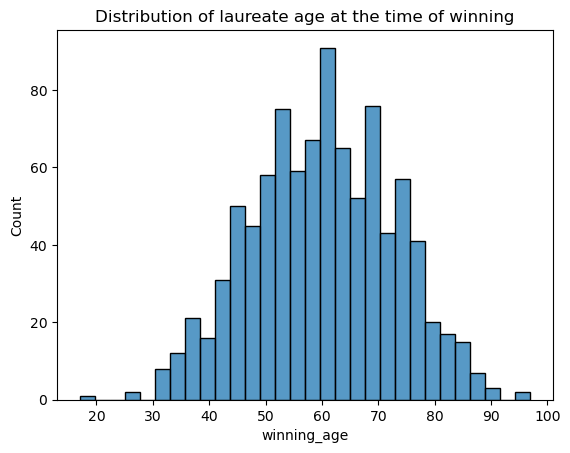

In [115]:
# Define custom bin edges
custom_bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

# Create a histogram of the 'sepal_length' column
sns.histplot(data=df_data, x="winning_age", bins=30)

# Add a title to the plot
plt.title("Distribution of laureate age at the time of winning")

# Display the plot
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [96]:
df_data["winning_age"].describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

Gua bingung sama perintah yang nomer 3

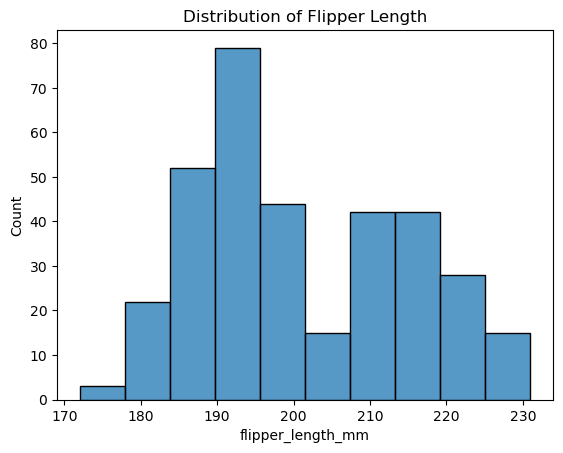

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
penguins = sns.load_dataset("penguins")

# Create a basic histogram of 'flipper_length_mm'
sns.histplot(data=penguins, x="flipper_length_mm")
plt.title("Distribution of Flipper Length")
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [98]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
887,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,Individual,Isamu Akasaki,1929-01-30,Chiran,Japan,Japan,Male,Meijo University,Nagoya,Japan,JPN,0.33,85.00


In [99]:
df_data[['year', 'winning_age']]

,year,winning_age
0,1901,49.00
1,1901,62.00
2,1901,47.00
3,1901,79.00
4,1901,73.00
...,...,...
957,2020,71.00
958,2020,NaN
959,2020,55.00
960,2020,68.00


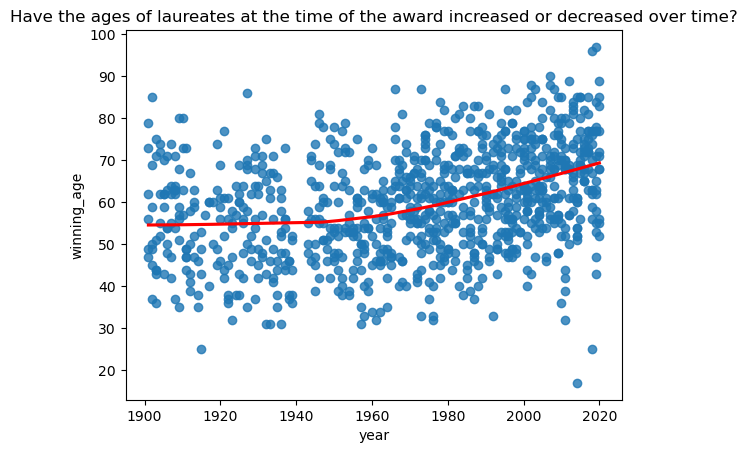

In [100]:
# Load a sample dataset

# Create a basic regression plot
sns.regplot(x="year", y="winning_age", data=df_data[['year', 'winning_age']], lowess=True, line_kws={'color': 'red'})
plt.title("Have the ages of laureates at the time of the award increased or decreased over time?")
plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [101]:
challenge5_df = df_data.groupby('category', as_index=True).describe()["winning_age"]
challenge5_df

,count,mean,min,25%,50%,75%,max,std
category,,,,,,,,
Chemistry,186.00,58.82,35.00,50.00,58.00,67.75,97.00,11.86
Economics,86.00,66.97,47.00,61.00,67.00,72.75,90.00,8.46
Literature,117.00,64.79,42.00,57.00,67.00,73.00,88.00,10.23
Medicine,222.00,58.58,32.00,50.00,57.00,66.75,87.00,11.78
Peace,107.00,60.90,17.00,54.00,62.00,71.00,87.00,13.39
Physics,216.00,56.44,25.00,45.75,55.00,66.00,96.00,14.34


In [102]:
challenge5_df.index

Index(['Chemistry', 'Economics', 'Literature', 'Medicine', 'Peace', 'Physics'], dtype='object', name='category')

In [103]:
challenge5_df['count']

category
Chemistry    186.00
Economics     86.00
Literature   117.00
Medicine     222.00
Peace        107.00
Physics      216.00
Name: count, dtype: float64

In [104]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
569,1986,Physics,The Nobel Prize in Physics 1986,"""for their design of the scanning tunneling mi...",1/4,Individual,Gerd Binnig,1947-07-20,Frankfurt-on-the-Main,West Germany (Germany),Germany,Male,IBM Zurich Research Laboratory,Rüschlikon,Switzerland,DEU,0.25,39.00


<Axes: xlabel='category', ylabel='winning_age'>

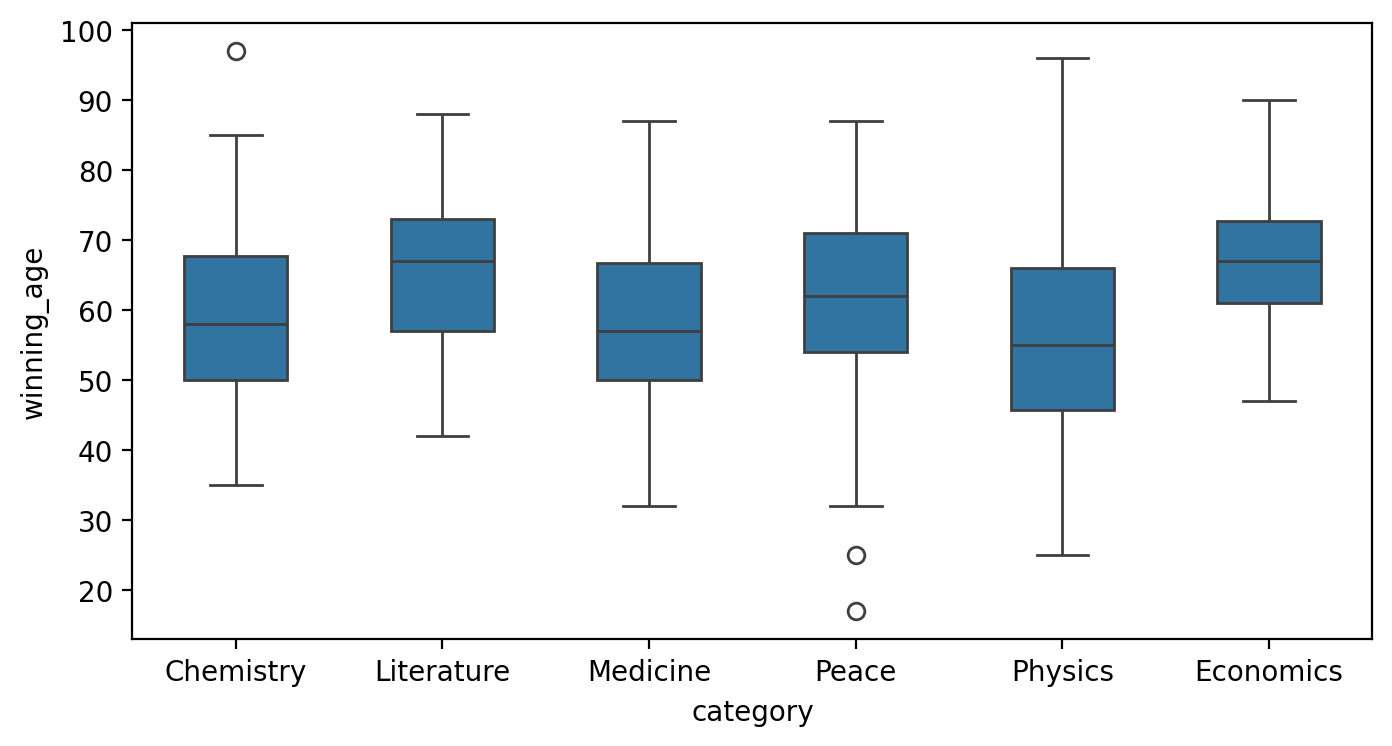

In [119]:
plt.figure(figsize=(8,4), dpi=200)
sns.boxplot(data=df_data, x='category', y="winning_age", width=.5, orient='v')

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


In [109]:
df_data.sample()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
500,1979,Medicine,The Nobel Prize in Physiology or Medicine 1979,"""for the development of computer assisted tomo...",1/2,Individual,Godfrey N. Hounsfield,1919-08-28,Newark,United Kingdom,United Kingdom,Male,"Central Research Laboratories, EMI",London,United Kingdom,GBR,0.50,60.00


<Figure size 4000x800 with 0 Axes>

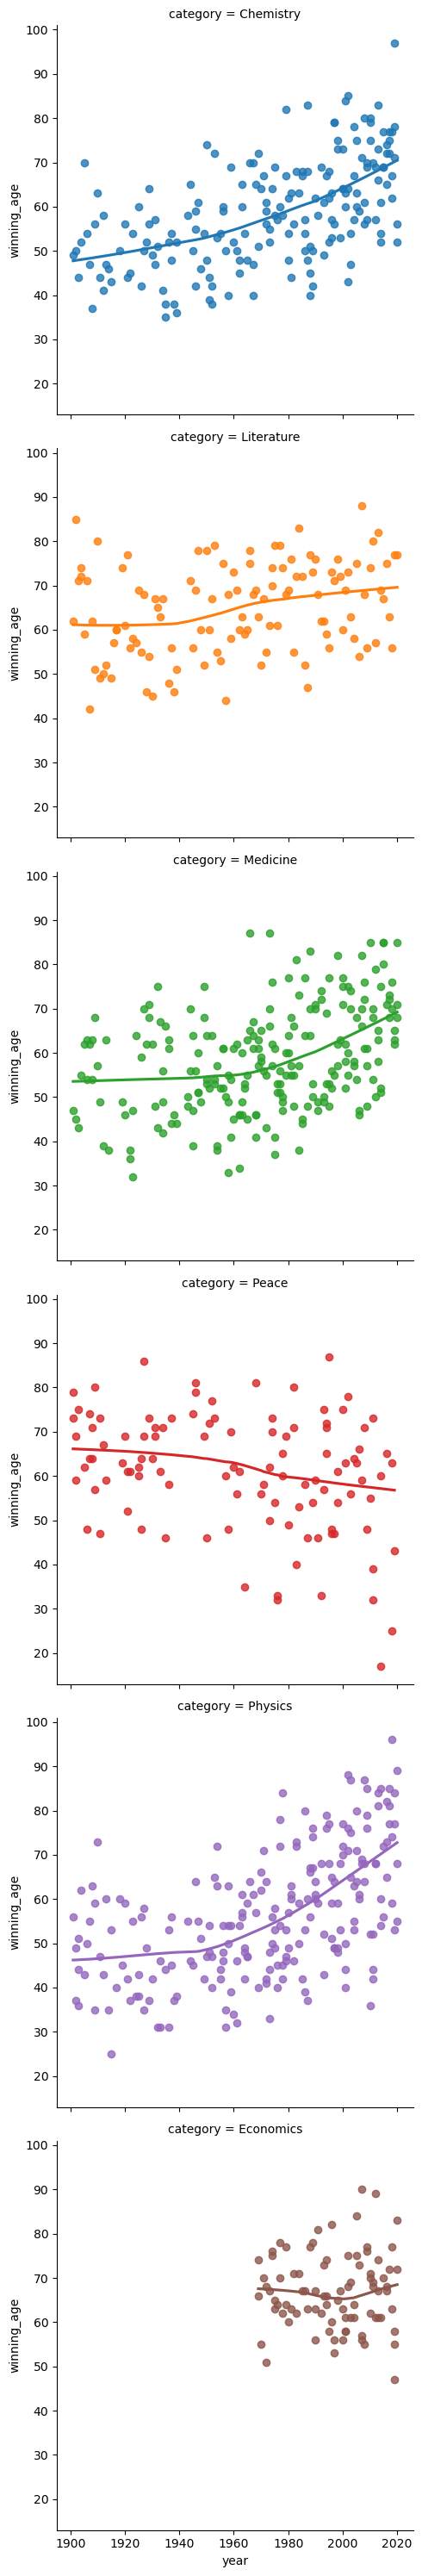

In [ ]:
# Create an lmplot
# x: column for the x-axis (e.g., total_bill)
# y: column for the y-axis (e.g., tip)
# hue: column to color points and regression lines by (e.g., day)
# data: the DataFrame containing the data
sns.lmplot(x="year",
           y="winning_age", 
            hue="category", 
            data=df_data,
            lowess=True, 
            row='category',
            )

# Display the plot
plt.show()

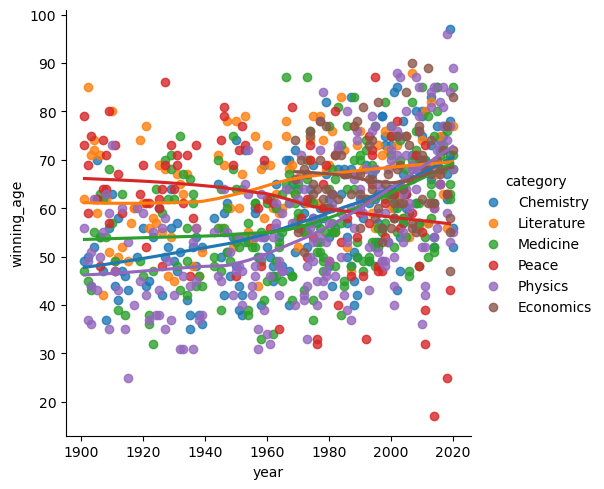

In [121]:

# Create an lmplot
# x: column for the x-axis (e.g., total_bill)
# y: column for the y-axis (e.g., tip)
# hue: column to color points and regression lines by (e.g., day)
# data: the DataFrame containing the data
sns.lmplot(x="year",
           y="winning_age", 
            hue="category", 
            data=df_data,
            lowess=True, 
            )

# Display the plot
plt.show()